In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import display

# Load the dataset
df = pd.read_csv('twitter_training.csv')
display(df.head())

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Rename columns to meaningful names
df.columns = ['id', 'category', 'sentiment_label', 'text']
display(df.head())

# Check for missing values
print(df.isnull().sum())

After renaming columns


,id,category,sentiment_label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Missing values in each column:
id                   0
category             0
sentiment_label      0
text               686
dtype: int64


In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Preprocess the data: Focus on 'sentiment_label' and 'text' columns
df = df[['sentiment_label', 'category', 'text']]

# Convert 'text' column to string type and handle missing values
df['text'] = df['text'].astype(str)
df['text'].fillna('', inplace=True)

<ipython-input-10-ec70c15babb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)
<ipython-input-10-ec70c15babb5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('', inplace=True)
<ipython-input-10-ec70c15babb5>:6: SettingWithCopyWarn

In [ ]:
# Calculate sentiment scores for each tweet
df['sentiment_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

<ipython-input-11-87592fca9a05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette=custom_palette_sentiment)


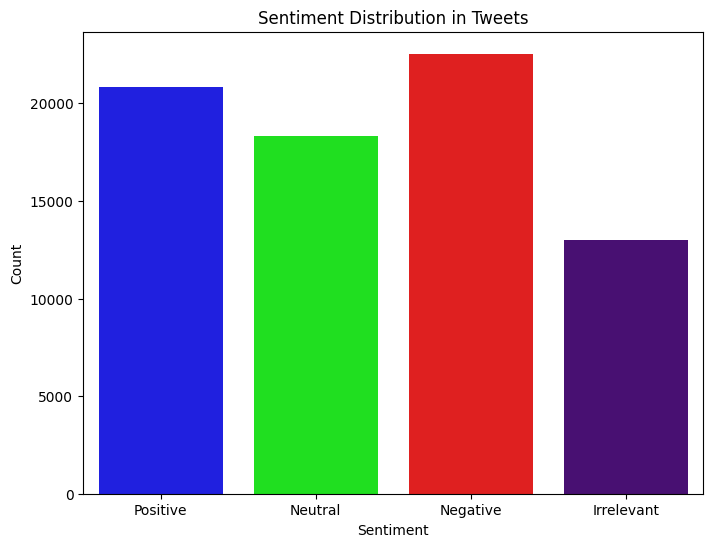

In [ ]:
# Plot sentiment distribution
custom_palette_sentiment = ["#0000FF", "#00FF00", "#FF0000", "#4B0082"]
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette=custom_palette_sentiment)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()